#Tabelas 

In [5]:
import numpy as np 
from tabulate import tabulate

#tabelas 

correntes     = np.array(['Correntes DC','1.34 A','1.2 A','1.0 A','0.8 A','0.6 A','0.4 A','0.2 A','0 A','-0.2 A','-0.4 A','-0.6 A','-0.8 A','-1.0 A','-1.2 A','-1.34 A'])
Tens_off      = np.array([-9.57,-9.27,-8.84,-8.38,-7.91,-7.43,-6.93,-6.40,-5.89,-5.38,-4.89,-4.43,-3.95,-3.51,-3.20]) 
offset        = Tens_off[7] 
Tens_sem_off  = Tens_off - offset 

#Criando a tabela 1 (com off-set)
table = np.empty((16,2),dtype=object)
table[:,0],table[0,1] =  correntes,'Vsaida'
table[1:,1] = Tens_off
print(f'OFFSET = {offset}')
print(f'Tensão se offset = {Tens_sem_off}')
print('Com OFFSET')
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid')) #impresão mais bonita com bordas continuas em vez de traços

#Criando a tabela 2 (sem off-set)
table[1:,1] = Tens_sem_off
print('Sem OFFSET')
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid')) #impresão mais bonita com bordas continuas em vez de traços
p

OFFSET = -6.4
Tensão se offset = [-3.17 -2.87 -2.44 -1.98 -1.51 -1.03 -0.53  0.    0.51  1.02  1.51  1.97
  2.45  2.89  3.2 ]
Com OFFSET
╒════════════════╤══════════╕
│ Correntes DC   │   Vsaida │
╞════════════════╪══════════╡
│ 1.34 A         │    -9.57 │
├────────────────┼──────────┤
│ 1.2 A          │    -9.27 │
├────────────────┼──────────┤
│ 1.0 A          │    -8.84 │
├────────────────┼──────────┤
│ 0.8 A          │    -8.38 │
├────────────────┼──────────┤
│ 0.6 A          │    -7.91 │
├────────────────┼──────────┤
│ 0.4 A          │    -7.43 │
├────────────────┼──────────┤
│ 0.2 A          │    -6.93 │
├────────────────┼──────────┤
│ 0 A            │    -6.4  │
├────────────────┼──────────┤
│ -0.2 A         │    -5.89 │
├────────────────┼──────────┤
│ -0.4 A         │    -5.38 │
├────────────────┼──────────┤
│ -0.6 A         │    -4.89 │
├────────────────┼──────────┤
│ -0.8 A         │    -4.43 │
├────────────────┼──────────┤
│ -1.0 A         │    -3.95 │
├────────────────┼─────

NameError: name 'p' is not defined

# Respostas 

# # 3 - a)

# #Usando dados da internet

In [75]:
import math  as ma
import sympy as sy

m,k,cm = 10**-3,10**3,10**-2
#respondendo as peguntas
#Entregue pela professora
#L =170*10*m #mH
Q = 2

#per_fer = sy.symbols('per_fer')

# dados do roteiro 
N = 50  #numero de espiras
A = 0.2*(cm**2) #Area da ferrite
per_ar = 4*ma.pi*10**-7  #permisibilidade do ar 
lg = 0.2*cm 
lf = 5.4*cm
per_fer= 2*k

R   = (lg/(per_ar*A)) + (lf/(per_fer*A)) #relutancia do sensor e
#usando a indutancia para achar a relutancia  
L = (N**2)/R 


'''
R = (N**2)/L 
equ = (lg/(per_ar*A)) + (lf/(per_fer*A)) - R
per_fer = sy.solve(equ)
per_fer*u
'''
print(L)

3.14159260029393e-05


# #Usando dados do experimento , Encontrando a permibilidde

In [104]:
import math  as ma
import sympy as sy

m,k,cm = 10**-3,10**3,10**-2
#respondendo as peguntas
#Entregue pela professora
L =170*m #H
Q = 2

per_fer = sy.symbols('per_fer')

# dados do roteiro 
N = 50  #numero de espiras
A = 0.2*(cm**2) #Area da ferrite (m)
per_ar = 4*ma.pi*10**-7  #permisibilidade do ar (H/m)
lg = 0.2*cm #(m)
lf = 5.4*cm #(m)


R = (N**2)/L 
equ = (lg/(per_ar*A)) + (lf/(per_fer*A)) - R
per_fer = sy.solve(equ)
print(f'Relutancia (R) = {R}')
print(f'permibilidade Magnetica da Ferrite (μf) = {per_fer[0]*10**5}x10^-5')

Relutancia (R) = 14705.882352941175
permibilidade Magnetica da Ferrite (μf) = -3.39354719193155x10^-5


# # 3 - b)--descobrir oque e curva

-2.422713223931121


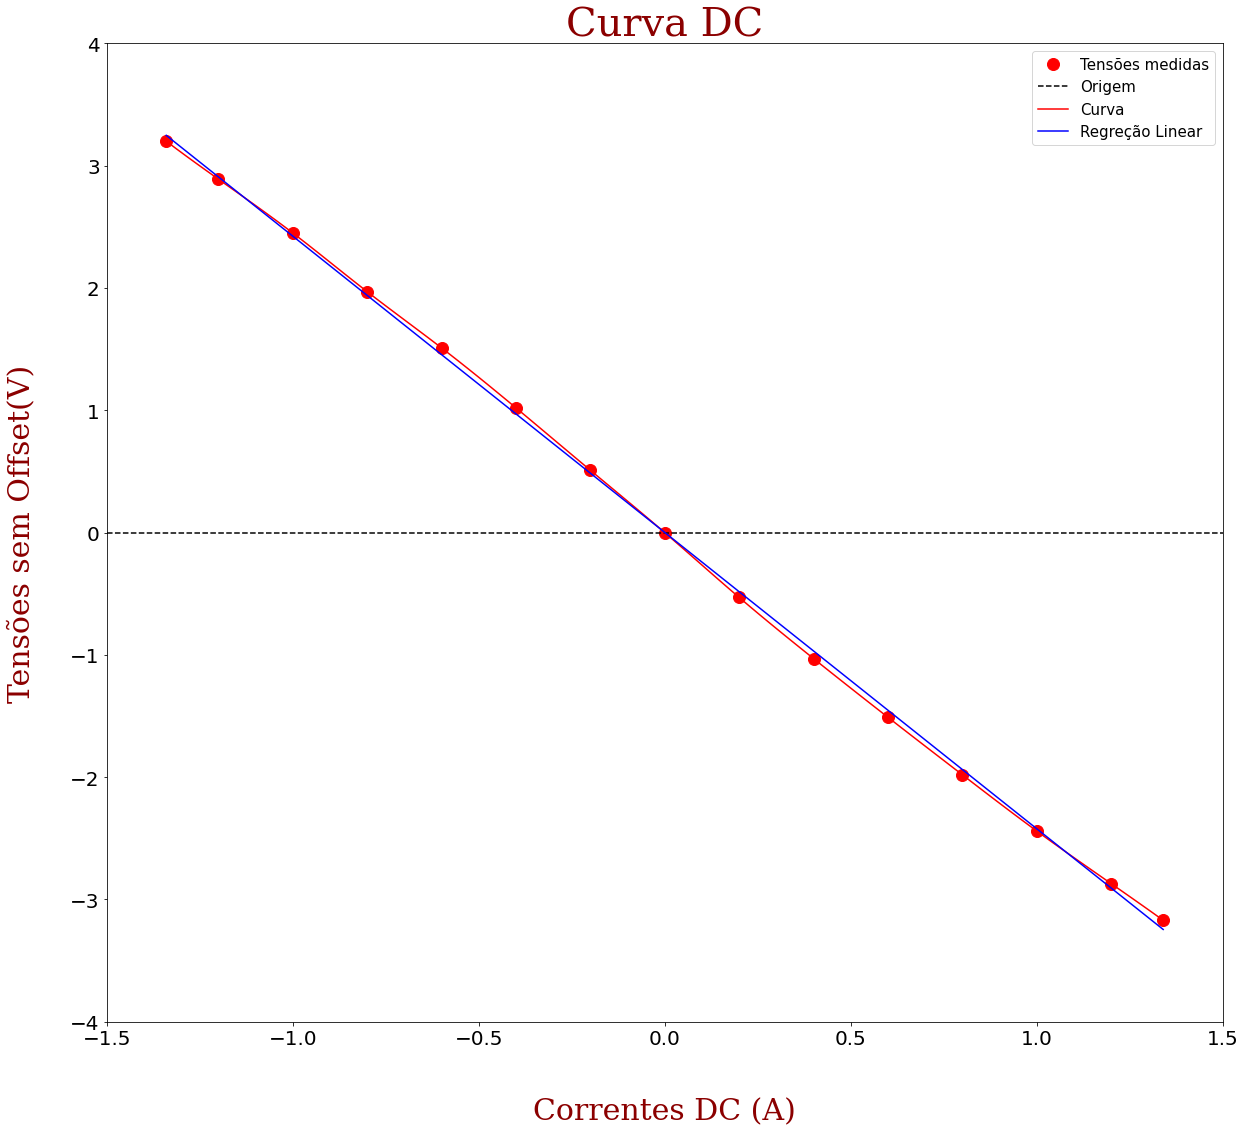

In [1]:
import math  as ma
import numpy as np
import sympy as sy
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

m,k,cm = 10**-3,10**3,10**-2

correntes  = np.array([1.34 ,1.2 ,1.0 ,0.8 ,0.6 ,0.4 ,0.2 ,0 ,-0.2 ,-0.4 ,-0.6 ,-0.8 ,-1.0 ,-1.2 ,-1.34 ])
Tens_off      = np.array([-9.57,-9.27,-8.84,-8.38,-7.91,-7.43,-6.93,-6.40,-5.89,-5.38,-4.89,-4.43,-3.95,-3.51,-3.20]) 
offset        = Tens_off[7] 
Tens_sem_off  = Tens_off - offset

#interpolei para ter mais pontos para ter uma curva mais suave(mas como os pontos são praticamente retas não fez difereça)
x = correntes
y = Tens_sem_off

new_length = 100
new_x = np.linspace(x.min(), x.max(), new_length)
new_y = interpolate.interp1d(x, y, kind='cubic')(new_x)

#regressão linear
A = np.vstack([x, np.ones(len(x))]).T  #tansfoma eum  matriz como a primieta coluna igual a x, a segunda 1
m, c = np.linalg.lstsq(A, y, rcond=None)[0]  #m e o coeficiente , c o erro (y = mx + c)

#grafico

font1 = {'family':'serif','color':'black','size':40}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure( figsize=(20, 18))#Altura o tamanho da imagem 
fig1 = plt.plot(x,y, 'ro', label='Original data', markersize=12) #grafico bem elaborado com pontos e tamanho 10 
plt.axhline(y=0, color="black", linestyle="--")
#leg  = plt.legend()
plt.tick_params(labelsize=20)
plt.title('Curva DC',fontsize=40,fontdict = font2)
plt.xlabel('Correntes DC (A)',fontsize=30,fontdict = font2,labelpad=50)
plt.ylabel('Tensões sem Offset(V)',fontsize=30,fontdict = font2,labelpad=35)
plt.axis([-1.5,1.5, -4, 4]) # [xmin, xmax, ymin, ymax]
fig2 = plt.plot(new_x,new_y, 'r-', label='Original data', markersize=5) #grafico bem elaborado com pontos e tamanho 10 
fig3 = plt.plot(x, m*x + c, 'b', label='Fitted line')
print(m)
plt.legend(['Tensões medidas', 'Origem', 'Curva','Regreção Linear'], loc=1,fontsize =15)
plt.show()

# # 3 - c)

# #Campo magnetico para cada corretente

Campos magneticos para cada corrente =  [ 227.8  204.   170.   136.   102.    68.    34.     0.   -34.   -68.
 -102.  -136.  -170.  -204.  -227.8]

BxVsaida(Sensibilidade) com offset = [-722.126 -585.48  -414.8   -269.28  -154.02   -70.04   -18.02     0.
  -17.34   -69.36  -154.02  -267.92  -416.5   -589.56  -728.96 ]

0.09351675382163604


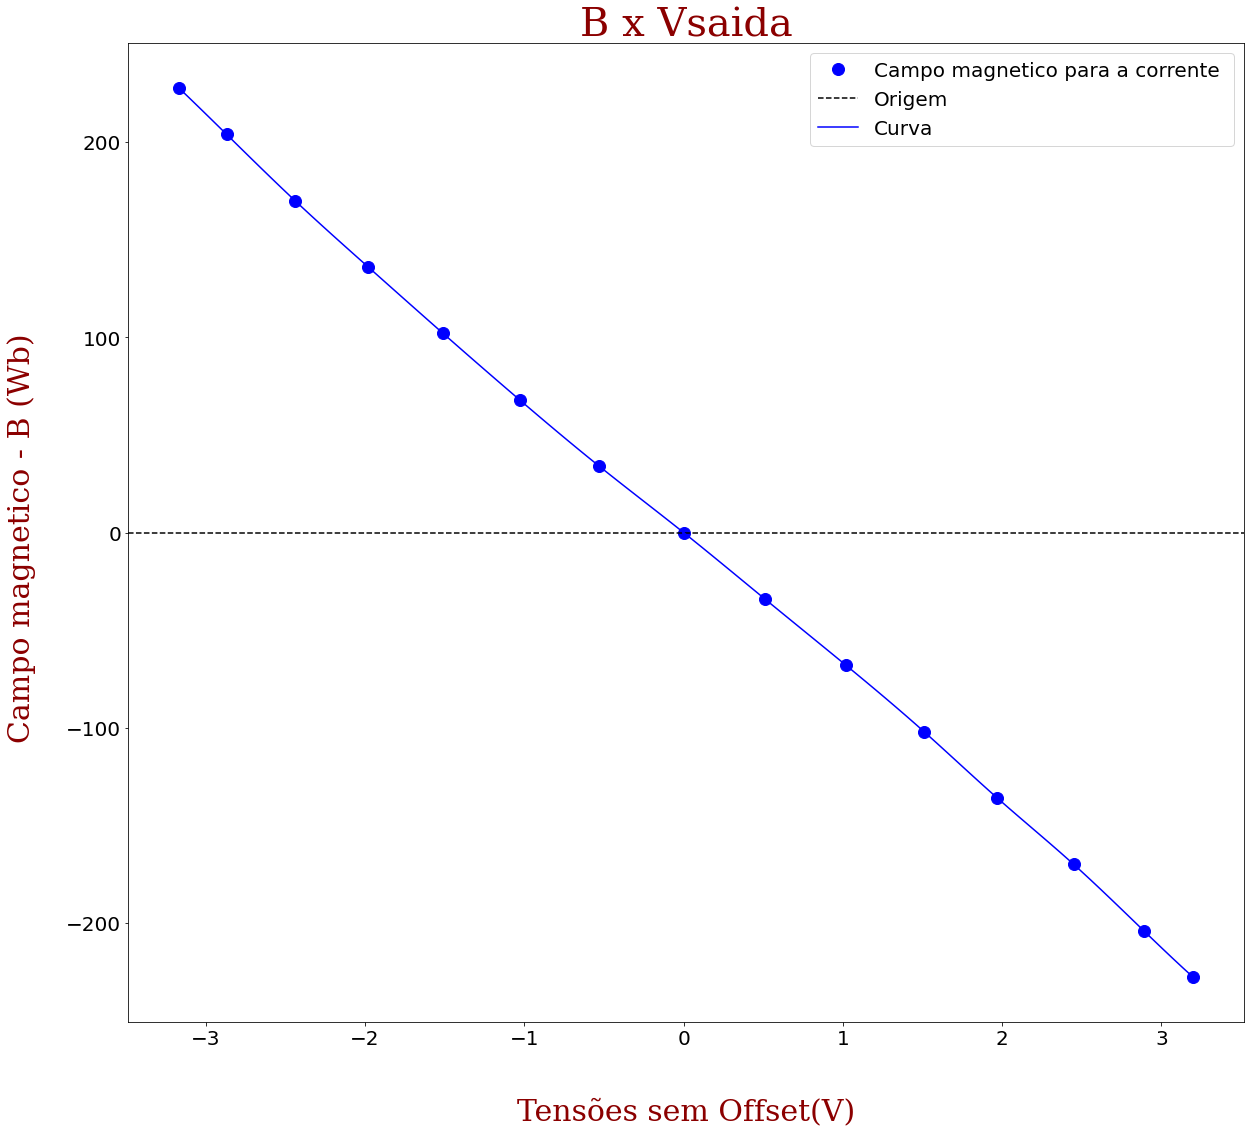

In [4]:
import math  as ma
import numpy as np
import sympy as sy
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

m,k,cm = 10**-3,10**3,10**-2

correntes  = np.array([1.34 ,1.2 ,1.0 ,0.8 ,0.6 ,0.4 ,0.2 ,0 ,-0.2 ,-0.4 ,-0.6 ,-0.8 ,-1.0 ,-1.2 ,-1.34 ])
Tens_off      = np.array([-9.57,-9.27,-8.84,-8.38,-7.91,-7.43,-6.93,-6.40,-5.89,-5.38,-4.89,-4.43,-3.95,-3.51,-3.20]) 
offset        = Tens_off[7] 
Tens_sem_off  = Tens_off - offset

L =170*m #H
N = 50  #numero de espiras
A = 0.2*(cm**2) #Area da ferrite (m)
R = (N**2)/L
B = (N*correntes)/(R*A)
print(f'Campos magneticos para cada corrente =  {B}\n')
#print(f'BxVsaida(Sensibilidade) com offset = {B*Tens_off}\n')
print(f'BxVsaida(Sensibilidade) com offset = {B*Tens_sem_off}\n')

#interpolei para ter mais pontos para ter uma curva mais suave(mas como os pontos são praticamente retas não fez difereça)
x = Tens_sem_off
y = B

new_length = 100
new_x = np.linspace(x.min(), x.max(), new_length)
new_y = interpolate.interp1d(x, y, kind='cubic')(new_x)

#regressão linear
A = np.vstack([x, np.ones(len(x))]).T  #tansfoma eum  matriz como a primieta coluna igual a x, a segunda 1
m, c = np.linalg.lstsq(A, y, rcond=None)[0]  #m e o coeficiente , c o erro (y = mx + c)


#grafico B*Vsaida

font1 = {'family':'serif','color':'black','size':40}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure( figsize=(20, 18))#Altura o tamanho da imagem 
fig1 = plt.plot(x,y, 'bo', label='Original data', markersize=12) #grafico bem elaborado com pontos e tamanho 10 
plt.axhline(y=0, color="black", linestyle="--")
#leg  = plt.legend()
plt.tick_params(labelsize=20)
plt.title('B x Vsaida',fontsize=40,fontdict = font2)
plt.xlabel('Tensões sem Offset(V)',fontsize=30,fontdict = font2,labelpad=50)
plt.ylabel('Campo magnetico - B (Wb) ',fontsize=30,fontdict = font2,labelpad=30)
#plt.axis([-1.5,1.5, -4, 4]) # [xmin, xmax, ymin, ymax]
fig2 = plt.plot(new_x,new_y, 'b-', label='Original data', markersize=5) #grafico bem elaborado com pontos e tamanho 10 
#fig3 = plt.plot(x, m*x + c, 'b', label='Fitted line')
print(c)
plt.legend(['Campo magnetico para a corrente ', 'Origem', 'Curva','Regreção Linear'], loc=1,fontsize =20)
plt.show()

# # 3 - d)--materia do sensor Hall e otimização da sensibilidade

# # 3 - e)--Aplicações do sensor de hall